In [11]:
import torch

x = torch.arange(4.0, requires_grad=True)
print(f"x.grad={x.grad}")
y = 2 * torch.dot(x, x)
print(f'y={y}')

y.backward()

print(f'after backward x.grad {x.grad}')

x.grad=None
y=28.0
after backward x.grad tensor([ 0.,  4.,  8., 12.])


In [12]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [13]:
x.grad.zero_()
y = (x ** 2).sum()
y.backward()
x.grad  


tensor([0., 2., 4., 6.])

In [15]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u
print(f'x.grad={x.grad}')

x.grad=tensor([0., 1., 4., 9.])


In [16]:
x.grad.zero_()
y = x * x
z = y * x

z.sum().backward()
x.grad == 3 * x**2
print(f'x.grad={x.grad}')

x.grad=tensor([ 0.,  3., 12., 27.])


In [17]:
a = torch.randn(size=(), requires_grad=True)
print(a)

tensor(-0.1239, requires_grad=True)


In [21]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return  c

a = torch.randn(size=(1, 3), requires_grad=True)
d = f(a)


# d.backward(torch.ones_like(d)) == d.sum().backward()

In [22]:
d = torch.arange(3.0, requires_grad=True)

d1 = d.clone().detach().requires_grad_()
d1.backward(torch.ones_like(d1))
grad1 = d1.grad.clone()

d2 = d.clone().detach().requires_grad_()
d2.sum().backward()
grad2 = d2.grad.clone()

print(torch.equal(grad1, grad2))

True


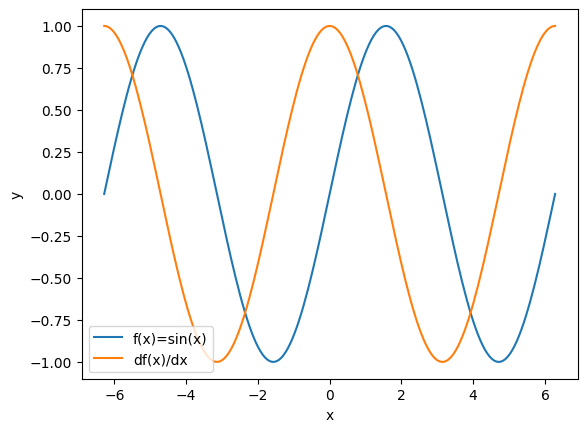

In [24]:
import matplotlib.pyplot as plt
def f(x):
    return torch.sin(x)

def df(x):
    x.requires_grad_()
    y = f(x)
    y.sum().backward()
    return x.grad

x = torch.linspace(-2*torch.pi, 2*torch.pi, 200)

y1 = f(x)
y2 = df(x)

plt.plot(x.detach().numpy(), y1.detach().numpy(), label='f(x)=sin(x)')
plt.plot(x.detach().numpy(), y2.detach().numpy(), label='df(x)/dx')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(10, fair_probs).sample((50000,))
print(f'counts.shape={counts.shape}')

counts.shape=torch.Size([50000, 6])


cum_counts=tensor([[1.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00],
        [1.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00, 4.0000e+00],
        [4.0000e+00, 3.0000e+00, 8.0000e+00, 7.0000e+00, 4.0000e+00, 4.0000e+00],
        ...,
        [8.3141e+04, 8.3553e+04, 8.3397e+04, 8.2886e+04, 8.3571e+04, 8.3432e+04],
        [8.3144e+04, 8.3555e+04, 8.3399e+04, 8.2886e+04, 8.3574e+04, 8.3432e+04],
        [8.3145e+04, 8.3558e+04, 8.3403e+04, 8.2887e+04, 8.3574e+04, 8.3433e+04]])


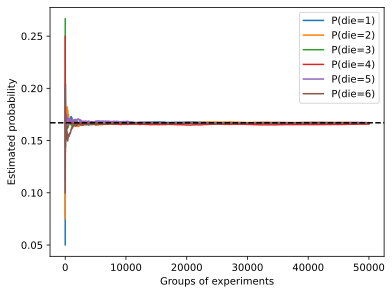

In [30]:
cum_counts = counts.cumsum(dim=0)
print(f'cum_counts={cum_counts}')
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()